# Animierte Graphen

In [1]:
import os
import imageio
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Schritt 1: 2D-Scatter, komplett per Hand

In [ ]:
# Was ist ein Film? Was ist eine Animation? Was haben sie gemeinsam?
# Beides sind Ablauffolgen von Bildern, auch Frames genannt. Filme laufen kontinuierlich, Frames nicht.
# Beides vermittelt einen Eindruck von Bewegung.
# Animationen von Diagrammen wären dann entsprechend viele Diagramme die hintereinander ablaufen und eine Entwicklung anzeigen.

In [20]:
if not os.path.exists('plots'):
	os.mkdir('plots')
	print('Ordner wurde angelegt!')

In [29]:
# Noch einfach via Per-Hand-Eingabe eines einfachen Scatterplots:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(0, 0)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

fig.savefig(r'plots/bild00.png', dpi=96)
plt.close()

In [27]:
# Skalierbare Vektorgraphik erstellen mit .svg
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(0, 0)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

fig.savefig(r'plots/bild00.svg')
plt.close()

In [32]:
# Ab jetzt wiederholen für alle weiteren gewünschten Durchführungen
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(0.2, 0.2)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

fig.savefig(r'plots/bild01.png', dpi=96)
plt.close()

In [ ]:
# ...

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(1, 1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

fig.savefig(r'plots/bild05.png', dpi=96)
plt.close()

# Wiederholung
## For-Schleifen

In [34]:
# Bei for-Schleifen werden iterierbare Strukturen durchlaufen und dabei
# gewisse vom Programmierer festgelegte Schritte ausgeführt
# Beispiel:
for i in range(5):
	print(i)

0
1
2
3
4


In [35]:
word = 'hallo'
for char in word:
	print(char)

h
a
l
l
o


# Miniübung 1
## Schreibe eine For-Schleife, um alle Werte der folgenden Liste multipliziert mit 4 auszugeben

In [ ]:
liste = [3, 4, 12, 89, 56, 756, 34, 23435, 2345]

# Miniübung 2
## Schreibe eine verschachtelte For-Schleife, um jeden Wert der Liste1 mit jedem Wert der Liste2 zu addieren

In [ ]:
liste1 = [23, 42, 1, 435, 3, 3]
liste2 = [3, 345, 1]

# Übung:
#### Automatisiere nun die obige Grafikerstellung
#### Lege dafür zunächst einen Unterordner moving_point an
#### Erzeuge mittels for-Schleife die obigen fünf Diagramme des Punkts.

In [42]:
if not os.path.exists('moving_point'):
	os.mkdir('moving_point')
	print('Ordner angelegt!')

In [ ]:
# Version mit plt.close():

for i in range(6):
	fig, ax = plt.subplots(figsize=(5, 5))
	ax.scatter(x=i * 0.2, y=i * 0.2)
	ax.set_xlim([0, 1])
	ax.set_ylim([0, 1])
	plt.savefig(fname=fr"moving_point/Bild0{i}.png", dpi=96)
	plt.close()


In [43]:
# Mit ax.clear() (etwas effizienter):
fig, ax = plt.subplots(figsize=(5, 5))

for i in range(6):
	lin_coord = i * 0.2
	ax.scatter(x=lin_coord, y=lin_coord)
	ax.set_xlim([0, 1])
	ax.set_ylim([0, 1])
	plt.savefig(fname=fr"moving_point/Bild0{i}.png", dpi=96)
	ax.clear()

plt.close()

In [ ]:
# Mit numpy linspace und enumerate:
fig, ax = plt.subplots(figsize=(5, 5))

for i, num in enumerate(np.linspace(0, 1, 6)):
	ax.scatter(x=num, y=num)
	ax.set_xlim([0, 1])
	ax.set_ylim([0, 1])
	plt.savefig(fname=fr"moving_point/Bild0{i}.png", dpi=96)
	ax.clear()

plt.close()

### Von Einzelbildern zur Animation!

In [45]:
# Was listdir macht (list directory, "liste die Inhalte folgenden Ordners auf"):
mp_files = os.listdir('moving_point')
mp_files

['Bild00.png',
 'Bild01.png',
 'Bild02.png',
 'Bild03.png',
 'Bild04.png',
 'Bild05.png']

In [46]:
type(mp_files)

list

In [47]:
type(mp_files[0])

str

In [60]:
# Jetzt wollen wir diese Dateien aus dem Ordner zu einem GIF verbinden!
images = []
base_path = 'moving_point'

for file in os.listdir(base_path):
	# print(file)
	filepath = os.path.join(base_path, file)
	# print(filepath)
	imageio_file = iio.imread(filepath)
	images.append(imageio_file)

imageio.mimsave(
	r'moving_point/moving_point.gif',
	images,
	# Zeit pro Bild:
	duration=1_000
)

# duration-Parameter ist in Millisekunden!
# Zur Erinnerung:
# Milli > Tausendstel Sekunden
# Mikro > Millionstel Sekunden
# Nano > Milliardstel Sekunden

## Lasst uns das Meisterwerk öffnen und bewundern!


In [62]:
file_list = ['text.txt', 'portrait.png', 'installer.exe', 'foto.png']
for file in file_list:
	if file.endswith('png'):
		print(file)

portrait.png
foto.png


In [66]:
images = []
base_path = 'moving_point'

for file in os.listdir(base_path):
	if file.endswith('png'):
		filepath = os.path.join(base_path, file)
		imageio_file = iio.imread(filepath)
		images.append(imageio_file)

imageio.mimsave(
	r'moving_point/moving_point.gif',
	images,
	duration=500,
	# loop=0 macht Endlosschleife aus Animation:
	loop=0,
)

# Schritt 2: 3D-Scatterplot

In [67]:
penguins = sns.load_dataset("penguins")

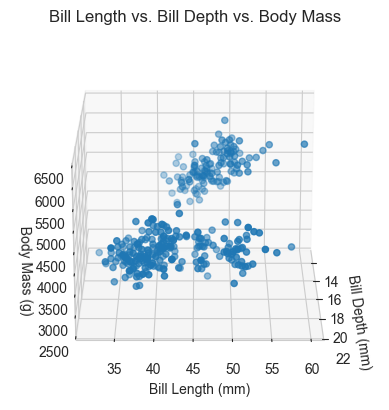

In [75]:
# Normaler 3D-Scatterplot von Schnabellänge, -breite und Körpermasse:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(
	'bill_depth_mm',
	'bill_length_mm',
	'body_mass_g',
	data=penguins
)

ax.set(
	title='Bill Length vs. Bill Depth vs. Body Mass',
	xlabel='Bill Depth (mm)',
	ylabel='Bill Length (mm)',
	zlabel='Body Mass (g)',
)

ax.view_init(20, 0, 0)

In [ ]:
# Die Idee: Diesen Plot erstellen wir uns jetzt ganz häufig und ändern dabei die Drehung im view_init. Dadurch rotiert dann der Würfel im gif!

In [77]:
# An alle Gradzahlen mit range kommen:
list(range(0, 360))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [78]:
# Dasselbe mit Numpys Linspace:
np.linspace(0, 359, 360)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [79]:
circle_degrees = np.linspace(0, 359, 360)

In [81]:
# Ordner erstellen:
if not os.path.exists('rotating_penguins'):
	os.mkdir('rotating_penguins')
	print('Ordner wurde angelegt!')

In [83]:
# Und das machen wir doch ganz einfach mit einer Schleife!
# Anlauf 1:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for degree in circle_degrees:
	ax.scatter(
		'bill_depth_mm',
		'bill_length_mm',
		'body_mass_g',
		data=penguins
	)

	ax.set(
		title='Bill Length vs. Bill Depth vs. Body Mass',
		xlabel='Bill Depth (mm)',
		ylabel='Bill Length (mm)',
		zlabel='Body Mass (g)',
	)

	ax.view_init(20, degree, 0)
	fig.savefig(fr'rotating_penguins/Bild{int(degree)}.png')
	print(f'Pinguinwürfel bei {int(degree)} Grad Rotation hergestellt.')
	ax.clear()

plt.close()

Pinguinwürfel bei 0 Grad Rotation hergestellt.
Pinguinwürfel bei 1 Grad Rotation hergestellt.
Pinguinwürfel bei 2 Grad Rotation hergestellt.
Pinguinwürfel bei 3 Grad Rotation hergestellt.
Pinguinwürfel bei 4 Grad Rotation hergestellt.
Pinguinwürfel bei 5 Grad Rotation hergestellt.
Pinguinwürfel bei 6 Grad Rotation hergestellt.
Pinguinwürfel bei 7 Grad Rotation hergestellt.
Pinguinwürfel bei 8 Grad Rotation hergestellt.
Pinguinwürfel bei 9 Grad Rotation hergestellt.
Pinguinwürfel bei 10 Grad Rotation hergestellt.
Pinguinwürfel bei 11 Grad Rotation hergestellt.
Pinguinwürfel bei 12 Grad Rotation hergestellt.
Pinguinwürfel bei 13 Grad Rotation hergestellt.
Pinguinwürfel bei 14 Grad Rotation hergestellt.
Pinguinwürfel bei 15 Grad Rotation hergestellt.
Pinguinwürfel bei 16 Grad Rotation hergestellt.
Pinguinwürfel bei 17 Grad Rotation hergestellt.
Pinguinwürfel bei 18 Grad Rotation hergestellt.
Pinguinwürfel bei 19 Grad Rotation hergestellt.
Pinguinwürfel bei 20 Grad Rotation hergestellt.
Pi

In [84]:
# Und jetzt wieder zu einem Gif zusammenfügen!
images = []
base_path = 'rotating_penguins'

for file in os.listdir(base_path):
	if file.endswith('png'):
		file_path = os.path.join(base_path, file)
		imageio_file = iio.imread(file_path)
		images.append(imageio_file)

imageio.mimsave(
	r'rotating_penguins/rotating_penguins.gif',
	images,
	duration=100,
	loop=0
)
# Würfel ruckelt!

In [85]:
# Hintergrund: So sortiert klappt das nicht!
os.listdir('rotating_penguins')

['Bild0.png',
 'Bild1.png',
 'Bild10.png',
 'Bild100.png',
 'Bild101.png',
 'Bild102.png',
 'Bild103.png',
 'Bild104.png',
 'Bild105.png',
 'Bild106.png',
 'Bild107.png',
 'Bild108.png',
 'Bild109.png',
 'Bild11.png',
 'Bild110.png',
 'Bild111.png',
 'Bild112.png',
 'Bild113.png',
 'Bild114.png',
 'Bild115.png',
 'Bild116.png',
 'Bild117.png',
 'Bild118.png',
 'Bild119.png',
 'Bild12.png',
 'Bild120.png',
 'Bild121.png',
 'Bild122.png',
 'Bild123.png',
 'Bild124.png',
 'Bild125.png',
 'Bild126.png',
 'Bild127.png',
 'Bild128.png',
 'Bild129.png',
 'Bild13.png',
 'Bild130.png',
 'Bild131.png',
 'Bild132.png',
 'Bild133.png',
 'Bild134.png',
 'Bild135.png',
 'Bild136.png',
 'Bild137.png',
 'Bild138.png',
 'Bild139.png',
 'Bild14.png',
 'Bild140.png',
 'Bild141.png',
 'Bild142.png',
 'Bild143.png',
 'Bild144.png',
 'Bild145.png',
 'Bild146.png',
 'Bild147.png',
 'Bild148.png',
 'Bild149.png',
 'Bild15.png',
 'Bild150.png',
 'Bild151.png',
 'Bild152.png',
 'Bild153.png',
 'Bild154.png',
 '

In [88]:
# Wie sollten unsere Bilddateien idealerweise benannt sein:
# Bild001
# ...
# Bild010
# ...
# Bild312

In [87]:
# Zur Erinnerung:
format(1, '.2f')

'1.00'

In [89]:
format(1, '0>3')

'001'

In [91]:
# Dasselbe mit zfill:
'1'.zfill(3)

'001'

In [92]:
format(10, '0>3')

'010'

In [93]:
'10'.zfill(3)

'010'

In [94]:
format(100, '0>3')

'100'

In [95]:
'100'.zfill(3)

'100'

In [97]:
# Anlauf 2 mit zero fill (Auffüllen mit Nullen):
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for degree in circle_degrees:
	ax.scatter(
		'bill_depth_mm',
		'bill_length_mm',
		'body_mass_g',
		data=penguins
	)

	ax.set(
		title='Bill Length vs. Bill Depth vs. Body Mass',
		xlabel='Bill Depth (mm)',
		ylabel='Bill Length (mm)',
		zlabel='Body Mass (g)',
	)

	ax.view_init(20, degree, 0)
	fig.savefig(fr'rotating_penguins/Bild{int(degree):0>3}.png')
	print(f'Pinguinwürfel bei {int(degree)} Grad Rotation hergestellt.')
	ax.clear()

plt.close()

Pinguinwürfel bei 0 Grad Rotation hergestellt.
Pinguinwürfel bei 1 Grad Rotation hergestellt.
Pinguinwürfel bei 2 Grad Rotation hergestellt.
Pinguinwürfel bei 3 Grad Rotation hergestellt.
Pinguinwürfel bei 4 Grad Rotation hergestellt.
Pinguinwürfel bei 5 Grad Rotation hergestellt.
Pinguinwürfel bei 6 Grad Rotation hergestellt.
Pinguinwürfel bei 7 Grad Rotation hergestellt.
Pinguinwürfel bei 8 Grad Rotation hergestellt.
Pinguinwürfel bei 9 Grad Rotation hergestellt.
Pinguinwürfel bei 10 Grad Rotation hergestellt.
Pinguinwürfel bei 11 Grad Rotation hergestellt.
Pinguinwürfel bei 12 Grad Rotation hergestellt.
Pinguinwürfel bei 13 Grad Rotation hergestellt.
Pinguinwürfel bei 14 Grad Rotation hergestellt.
Pinguinwürfel bei 15 Grad Rotation hergestellt.
Pinguinwürfel bei 16 Grad Rotation hergestellt.
Pinguinwürfel bei 17 Grad Rotation hergestellt.
Pinguinwürfel bei 18 Grad Rotation hergestellt.
Pinguinwürfel bei 19 Grad Rotation hergestellt.
Pinguinwürfel bei 20 Grad Rotation hergestellt.
Pi

In [98]:
# Und jetzt wieder zu einem Gif zusammenfügen!
images = []
base_path = 'rotating_penguins'

for file in os.listdir(base_path):
	if file.endswith('png'):
		file_path = os.path.join(base_path, file)
		imageio_file = iio.imread(file_path)
		images.append(imageio_file)

imageio.mimsave(
	r'rotating_penguins/rotating_penguins.gif',
	images,
	duration=100,
	loop=0
)
# Würfel läuft nun flüssig!

# Übung

Du willst den Kursfortschritt bei DataCraft in einer Grafik darstellen und willst dafür eintragen, wie viele Stunden du dich mit den verschiedenen Programmen beschäftigt hast. Jeder Tag im Curriculum steht hierbei für 8 Stunden Erfahrung mit einem Programm.

Zum Start solltest du ein leeres Diagramm vorbereitet haben, in welchem die Balken "Excel", "Python" und "SQL" jeweils bei 0 sind. Danach sollten getrennt in dieser Reihenfolge die Programme wie folgt ansteigen:
- 15 Tage Excel
- 40 Tage Python
- 28 Tage SQL

Insgesamt sollten also 83 Bilder entstehen, in welchen das Säulendiagramm Stück für Stück größer wird. Achte dabei, dass von Anfang an die passenden Titel, Labels und Ticks gesetzt sind. Probiere aus, ob es ebenfalls Sinn ergibt, die Ticks vorab festzulegen oder ob sich diese "natürlich" entwickeln sollen. Als Tipp: Du kannst hierfür in 3 getrennten Schleifen diese Bilderreihen für die einzelnen Programme erstellen und ganz zum Schluss über alle Bilder mit imageio das GIF erstellen.

In [99]:
# Ordner erstellen:
folder_list = ['kursfortschritt', 'kursfortschritt/excel',
			   'kursfortschritt/python', 'kursfortschritt/sql']

for folder in folder_list:
	if not os.path.exists(folder):
		os.mkdir(folder)
		print(f"Ordner {folder} wurde angelegt!")

Ordner kursfortschritt wurde angelegt!
Ordner kursfortschritt/excel wurde angelegt!
Ordner kursfortschritt/python wurde angelegt!
Ordner kursfortschritt/sql wurde angelegt!


In [100]:
num_hours = 8
excel = np.linspace(0 * num_hours, 15 * num_hours, 16)
python = np.linspace(0 * num_hours, 40 * num_hours, 41)
sql = np.linspace(0 * num_hours, 28 * num_hours, 29)

In [101]:
# Programme
programme = ['Excel', 'Python', 'SQL']

In [102]:
# Bilder erstellen Excel
for index, hour in enumerate(excel):
	fig, ax = plt.subplots()
	values = [excel[index], python[0], sql[0]]
	ax.bar(programme, values)
	ax.set_xlabel("Programm")
	ax.set_ylabel("Kenntnisse in Stunden")
	ax.set_title("Ablauf Datacraft")
	plt.savefig(fr"kursfortschritt/excel/bild{index:0>4}.png", dpi=96)
	plt.close()

In [103]:
# Bilder erstellen Python
for index, hour in enumerate(python):
	fig, ax = plt.subplots()
	ax.bar(['Excel', 'Python', 'SQL'], [excel[-1], python[index], sql[0]])
	ax.set_xlabel("Programm")
	ax.set_ylabel("Kenntnisse in Stunden")
	ax.set_title("Ablauf Datacraft")
	plt.savefig(fr"kursfortschritt/python/bild{index:0>4}.png", dpi=96)
	plt.close()

In [104]:
# Bilder erstellen SQL
for index, hour in enumerate(sql):
	fig, ax = plt.subplots()
	ax.bar(['Excel', 'Python', 'SQL'], [excel[-1], python[-1], sql[index]])
	ax.set_xlabel("Programm")
	ax.set_ylabel("Kenntnisse in Stunden")
	ax.set_title("Ablauf Datacraft")
	plt.savefig(fr"kursfortschritt/sql/bild{index:0>4}.png", dpi=96)
	plt.close()

In [105]:
# Und jetzt wieder zu einem Gif einfügen!
images = []
path = r"kursfortschritt"
for file in os.listdir(f"{path}/excel"):
	if file.endswith("png"):
		images.append(iio.imread(f"{path}/excel/{file}"))
for file in os.listdir(f"{path}/python"):
	if file.endswith("png"):
		images.append(iio.imread(f"{path}/python/{file}"))
for file in os.listdir(f"{path}/sql"):
	if file.endswith("png"):
		images.append(iio.imread(f"{path}/sql/{file}"))

imageio.mimsave(f"{path}/movie.gif", images, duration=500)